## Recommender Systems with Python
Welcome to the code notebook for Recommender Systems with Python. In this lecture we will develop basic recommendation systems using Python and pandas.

In this notebook, we will focus on providing a basic recommendation system by <b>suggesting items that are most similar to a particular item,</b>. in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

There is no project for this topic, instead you have the option to work through the advanced lecture version of this notebook (totally optional!).

Let's get started!

In [1]:
import numpy as np
import pandas as pd

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('Datasets/u.data', sep='\t', names=column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
df.shape

(100003, 4)

In [5]:
df.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [6]:
df.rating.value_counts()

4    34174
3    27145
5    21203
2    11370
1     6111
Name: rating, dtype: int64

### Now let's get the  movie titles

In [8]:
movie_titles = pd.read_csv("Datasets/Movie_Id_Titles")

In [9]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [10]:
movie_titles.shape

(1682, 2)

In [11]:
movie_titles.isnull().sum()

item_id    0
title      0
dtype: int64

In [12]:
movie_titles.title.value_counts()

Designated Mourner, The (1997)               2
Ice Storm, The (1997)                        2
That Darn Cat! (1997)                        2
Money Talks (1997)                           2
Sliding Doors (1998)                         2
                                            ..
Mary Shelley's Frankenstein (1994)           1
Kid in King Arthur's Court, A (1995)         1
Interview with the Vampire (1994)            1
Heavenly Creatures (1994)                    1
Scream of Stone (Schrei aus Stein) (1991)    1
Name: title, Length: 1664, dtype: int64

In [13]:
movie_titles.groupby(by='title').count()

,item_id
title,
'Til There Was You (1997),1
1-900 (1994),1
101 Dalmatians (1996),1
12 Angry Men (1957),1
187 (1997),1
...,...
Young Guns II (1990),1
"Young Poisoner's Handbook, The (1995)",1
Zeus and Roxanne (1997),1


### Merge the datasets

In [14]:
df2 = pd.merge(left=df, right=movie_titles, on="item_id")

In [15]:
df2.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [16]:
df2.shape

(100003, 5)

In [17]:
df2.ndim

2

In [18]:
df2.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
title        0
dtype: int64

### EDA
Let's explore the data a bit and get a look at some of the best rated movies.

### Visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='white')

#### Let's create a ratings dataframe with average rating and number of ratings

In [20]:
df2.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [21]:
# Number of unique movies

len(df2['title'].unique())

1664

In [22]:
df2['title'].unique()

array(['Star Wars (1977)', 'Empire Strikes Back, The (1980)',
       'Gone with the Wind (1939)', ..., 'Girls Town (1996)',
       'Silence of the Palace, The (Saimt el Qusur) (1994)',
       'Dadetown (1995)'], dtype=object)

In [23]:
# df2.groupby(by='title')['rating'].mean().sort_values(ascending=False).head()

df2.groupby(by='title').rating.mean().sort_values(ascending=False).head(50)

title
They Made Me a Criminal (1939)                                                 5.000000
Marlene Dietrich: Shadow and Light (1996)                                      5.000000
Saint of Fort Washington, The (1993)                                           5.000000
Someone Else's America (1995)                                                  5.000000
Star Kid (1997)                                                                5.000000
Great Day in Harlem, A (1994)                                                  5.000000
Aiqing wansui (1994)                                                           5.000000
Santa with Muscles (1996)                                                      5.000000
Prefontaine (1997)                                                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)                              5.000000
Pather Panchali (1955)                                                         4.625000
Some Mother's Son (1996)  

In [24]:
df2.groupby(by='title').rating.count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [25]:
df2.groupby(by='title').rating.count().sort_values(ascending=False).tail()

title
Great Day in Harlem, A (1994)         1
Other Voices, Other Rooms (1997)      1
Good Morning (1971)                   1
Girls Town (1996)                     1
Á köldum klaka (Cold Fever) (1994)    1
Name: rating, dtype: int64

In [26]:
# Make a dataframe by average ratings

ratings = pd.DataFrame(df2.groupby(by='title').rating.mean())

In [27]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [28]:
# Add a number of rating column in ratings dataset

ratings['num of ratings'] = df2.groupby(by='title').rating.count()

In [29]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [30]:
# Check the unique value of number fo ratings

len(ratings['num of ratings'].unique())

273

In [31]:
print("Maximum num of ratings: ",max(ratings['num of ratings']), ", Minimum num of ratings: ",
      min(ratings['num of ratings']))

Maximum num of ratings:  584 , Minimum num of ratings:  1


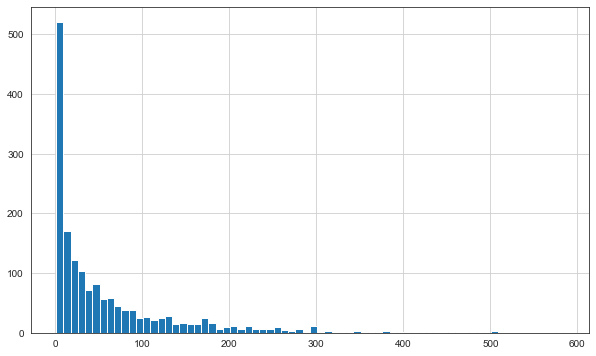

In [32]:
plt.figure(figsize=(10,6))
ratings['num of ratings'].hist(bins=70)
plt.show()

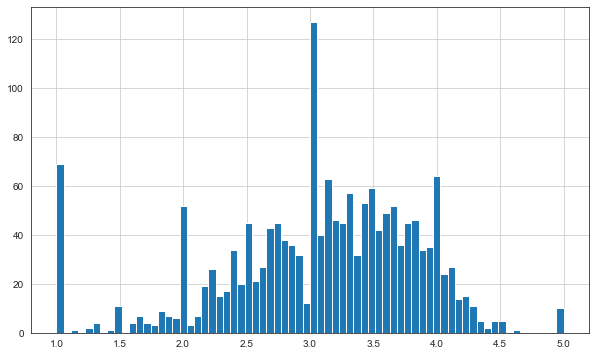

In [33]:
plt.figure(figsize=(10,6))
ratings['rating'].hist(bins=70)
plt.show()

#### The average ratings look likes ball curve that means normal distribuations

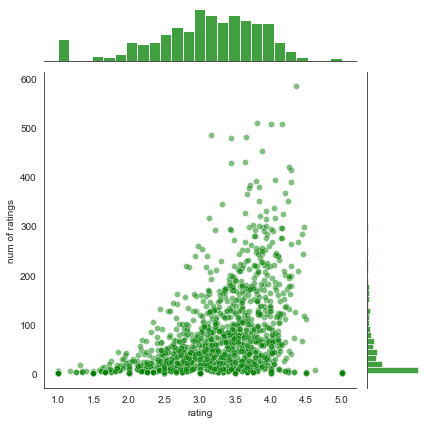

In [34]:
sns.jointplot(x='rating', y='num of ratings', data=ratings, color='green' ,alpha=0.5)
plt.show()

#### Okay! Now we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

### Recommending Similar Movies
Now let's create a matrix that has the 'user_id' on one axis and the movie 'title' on another axis. Each cell will then consist of the rating the user gave to that movie. Note, there will be a lot of NaN values, because most people have not seen most of the movies.

In [35]:
# Let's create a pivote table

moviemat = df2.pivot_table(values='rating', index='user_id', columns='title')

In [36]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's see the most rated movies

In [37]:
ratings.sort_values(by='num of ratings', ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [38]:
# Anothoer way to show it

ratings['num of ratings'].sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: num of ratings, dtype: int64

#### Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

In [39]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


#### Now let's grab the user ratings for those two movies:

In [40]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [41]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [42]:
liarliar_user_ratings.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

### We can then use corrwith() method to get correlations between two pandas series:

In [43]:
import warnings
warnings.filterwarnings(action='ignore')

In [44]:
similar_to_starwars = moviemat.corrwith(other=starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(other=liarliar_user_ratings)

In [45]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

#### Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [46]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).

In [47]:
corr_starwars.sort_values(by='Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0


#### Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [48]:
corr_starwars = corr_starwars.join(other=ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


### Now sort the values and notice how the titles make a lot more sense:

In [49]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values(by='Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


#### Now, if someone see the 'Star Wars(1977)' movie then we can recommend the next movie is 'Empire strikes Back, The(1980)' and so on

### Now the same for the comedy Liar Liar:

In [50]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(other=ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
